In [3]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
import os
from PIL import Image 
import numpy as np

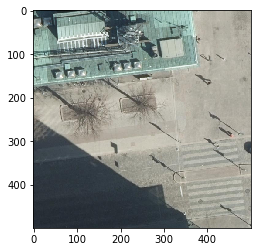

In [4]:
im = Image.open("miscel_images/center_2.png")  
imgar = np.array(im)
plt.imshow(im)

In [5]:
imgar.shape

(500, 500, 4)

In [6]:
image_coordinate=[24.941622,24.942265,60.170725,60.171073]

In [7]:
##calculating width of a patch in terms of latitude and logitude
x_cordinate_interval=image_coordinate[1]-image_coordinate[0]
y_cordinate_interval=image_coordinate[3]-image_coordinate[2]

In [8]:
#pedestrian crossing found with two bounding boxes 
bb1=[344,390,491,479]
bb2=[333,291,484,365]

In [9]:
##calculating the ratio of coordinate to image size
image_size=(500,500)
one_ybounding_translation=y_cordinate_interval/image_size[0]
one_xbounding_translation=x_cordinate_interval/image_size[0]
print(one_ybounding_translation)
print(one_xbounding_translation)

6.960000000049149e-07
1.2860000000003425e-06


In [10]:
#translation to coordinates for first bounding box
minLat=image_coordinate[0]+bb1[0]*one_xbounding_translation
minLon=image_coordinate[3]-bb1[3]*one_ybounding_translation
maxLat=image_coordinate[0]+bb1[2]*one_xbounding_translation
maxLon=image_coordinate[3]-bb1[1]*one_ybounding_translation

In [11]:
wms = WebMapService('https://kartta.hel.fi/ws/geoserver/avoindata/wms', version='1.3.0')

In [12]:
##verify coordinate mapping
img=wms.getmap(layers=["Ortoilmakuva_2019_5cm"],srs="EPSG:4123",bbox=(minLat,minLon,maxLat,maxLon),size=(500,500),format='image/png',transparent=True)
out = open('miscel_images/check0.png', 'wb')
out.write(img.read())
out.close()

In [13]:
#translation to coordinates for second bounding box
minLat=image_coordinate[0]+bb2[0]*one_xbounding_translation
minLon=image_coordinate[3]-bb2[3]*one_ybounding_translation
maxLat=image_coordinate[0]+bb2[2]*one_xbounding_translation
maxLon=image_coordinate[3]-bb2[1]*one_ybounding_translation

In [14]:
##verify coordinate mapping
img=wms.getmap(layers=["Ortoilmakuva_2019_5cm"],srs="EPSG:4123",bbox=(minLat,minLon,maxLat,maxLon),size=(500,500),format='image/png',transparent=True)
out = open('miscel_images/check1.png', 'wb')
out.write(img.read())
out.close()

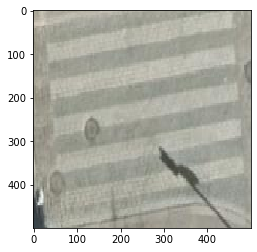

In [15]:
im = Image.open("miscel_images/check0.png")  
plt.imshow(im)

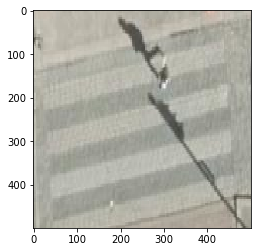

In [16]:
im = Image.open("miscel_images/check1.png")  
plt.imshow(im)